In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from neurocombat_sklearn import CombatModel

sns.set(style = 'white', font_scale=1.5)

from umap import UMAP

def plot_batch_effect(df_save, log2=False):
    sgenes = df_save.columns[1:]
    dfmp = df_save[sgenes]
    if log2:
        dfmp = np.log2(dfmp+1)
    
    mp = UMAP(spread=2.5, random_state=123)
    genes_2d = mp.fit_transform(dfmp)
    
    dfp = pd.DataFrame(genes_2d, columns=['x', 'y'],index=df_save.index)
    dfp = dfp.join(df_save)
    
    fig, ax = plt.subplots(figsize=(4,5))
    cohorts = dfp.cohort.unique()
    for bt in cohorts:
        dfp1 = dfp[dfp.cohort == bt]
        ax.scatter(dfp1.x, dfp1.y, label = bt, s = 20)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
    sns.despine(top=True, right=True, left=False, bottom=False)
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')

In [61]:
df_save = pd.read_csv('./data/batch_effect_test.csv', index_col=0)

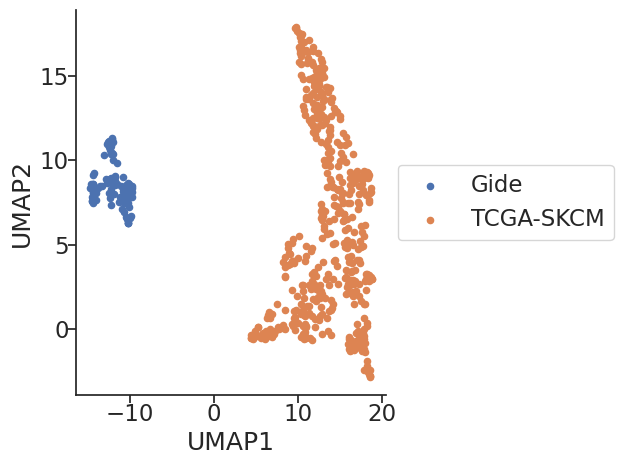

In [62]:
plot_batch_effect(df_save)

In [67]:
x = np.log2(df_save[df_save.columns[1:]]+1)
df_save = df_save[['cohort']].join(x)

In [71]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

tcga = df_save[df_save.cohort=='TCGA-SKCM']
gide = df_save[df_save.cohort=='Gide']

tcga_f = tcga[tcga.columns[1:]]
gide_f = gide[gide.columns[1:]]

scaler = StandardScaler()
scaler = scaler.fit(tcga_f)

tcga_f = pd.DataFrame(scaler.transform(tcga_f), index=tcga_f.index, columns = tcga_f.columns)
gide_f = pd.DataFrame(scaler.transform(gide_f), index=gide_f.index, columns = gide_f.columns)

df_save2 = pd.concat([tcga_f, gide_f])
df_save2 = df_save[['cohort']].join(df_save2)

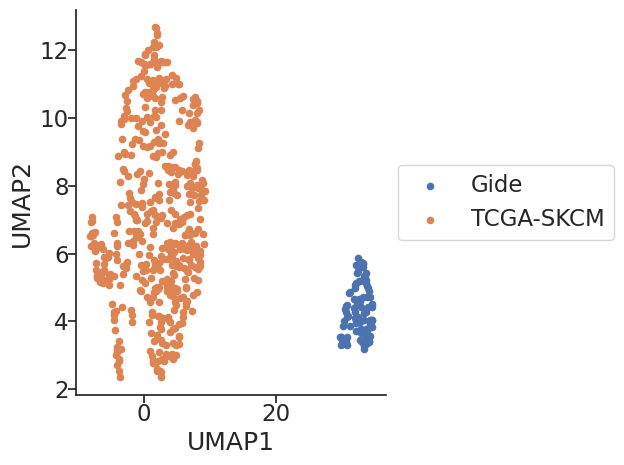

In [72]:
plot_batch_effect(df_save2)

In [92]:
data = df_save[df_save.columns[1:]]
batch = df_save[df_save.columns[:1]]
batch.cohort = batch.cohort.map({'Gide':1, 'TCGA-SKCM':2})

# Creating model
model = CombatModel()
model = model.fit(data, batch)

/tmp/ipykernel_25962/2554776790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch.cohort = batch.cohort.map({'Gide':1, 'TCGA-SKCM':2})
/home/was966/micromamba/envs/RNA/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [99]:
# Harmonize data
# could be performed together with fitt by using .fit_transform method
data_combat = model.transform(data, batch)
data_combat = pd.DataFrame(data_combat, index=data.index,columns=data.columns)
data_combat = df_save[['cohort']].join(data_combat)

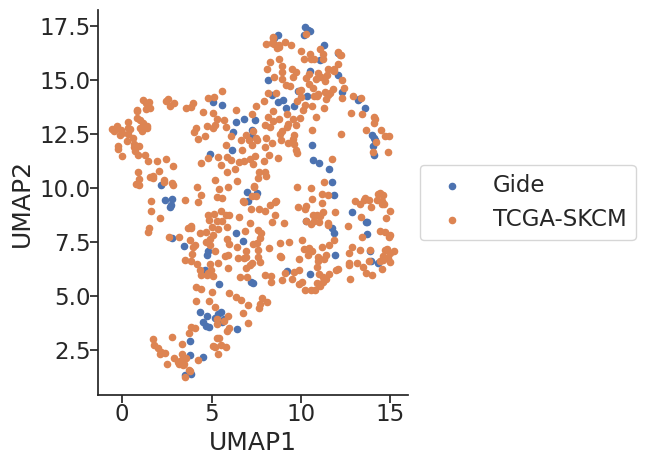

In [100]:
plot_batch_effect(data_combat)

In [183]:
sidx1 = df_save[df_save.cohort == 'TCGA-SKCM'].index
sidx2 = df_save[df_save.cohort == 'Gide'].index
sg = df_save.columns[1:]
cohort = df_save[['cohort']]

In [184]:
st1 = df_save[sg].loc[sidx1].T.transform('rank').T
st2 = df_save[sg].loc[sidx2].T.transform('rank').T

In [185]:
dfn = pd.concat([st1, st2])

In [186]:
df_save3 = cohort.join(dfn)

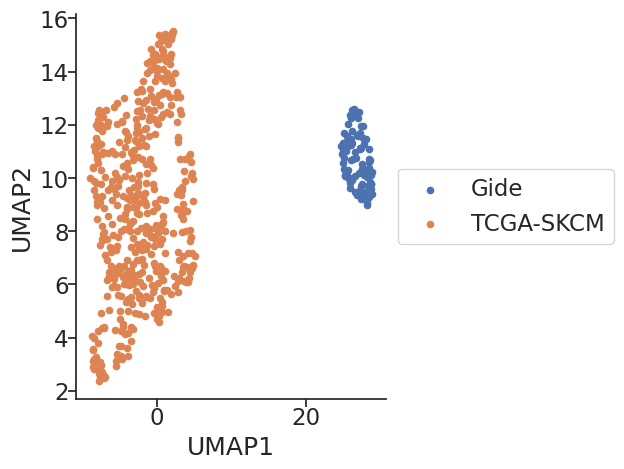

In [187]:
plot_batch_effect(df_save3)

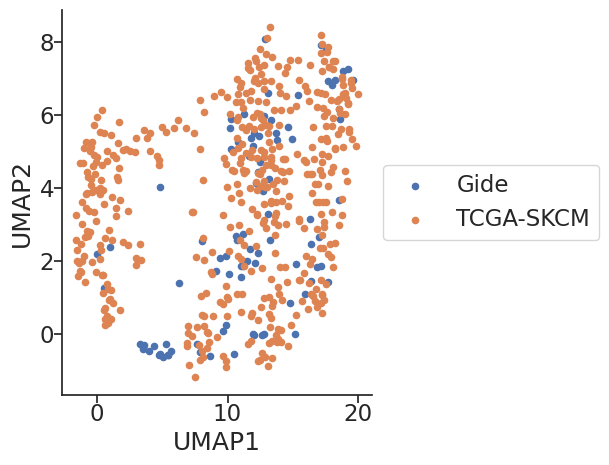

In [216]:
df1 = df_save[sg].loc[sidx1]
bottom_tertile_threshold = df1.quantile(1/3)
# 判断每个基因是否非活跃
st1 = df1.apply(lambda x: x.gt(bottom_tertile_threshold), axis=1)*1.0

df2 = df_save[sg].loc[sidx2]
bottom_tertile_threshold2 = df2.quantile(1/2)
# 判断每个基因是否非活跃
st2 = df2.apply(lambda x: x.gt(bottom_tertile_threshold2), axis=1)*1.0

dfn = pd.concat([st1, st2])
df_save4 = cohort.join(dfn)

plot_batch_effect(df_save3)

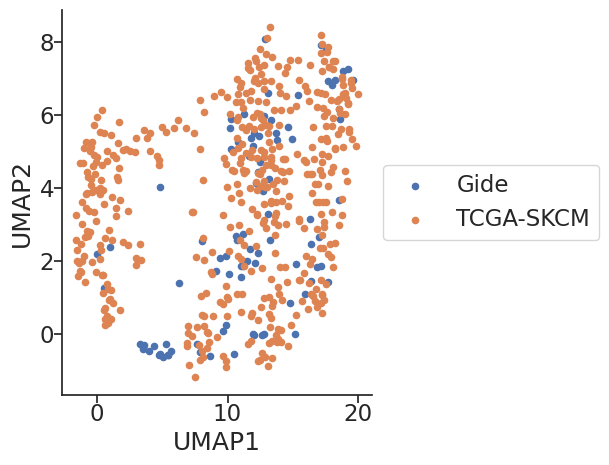

In [217]:
df1 = df_save[sg].loc[sidx1]
bottom_tertile_threshold = df1.quantile(1/4)
# 判断每个基因是否非活跃
st1 = df1.apply(lambda x: x.gt(bottom_tertile_threshold), axis=1)*1.0

df2 = df_save[sg].loc[sidx2]
bottom_tertile_threshold2 = df2.quantile(1/4)
# 判断每个基因是否非活跃
st2 = df2.apply(lambda x: x.gt(bottom_tertile_threshold2), axis=1)*1.0

dfn = pd.concat([st1, st2])
df_save4 = cohort.join(dfn)

plot_batch_effect(df_save3)

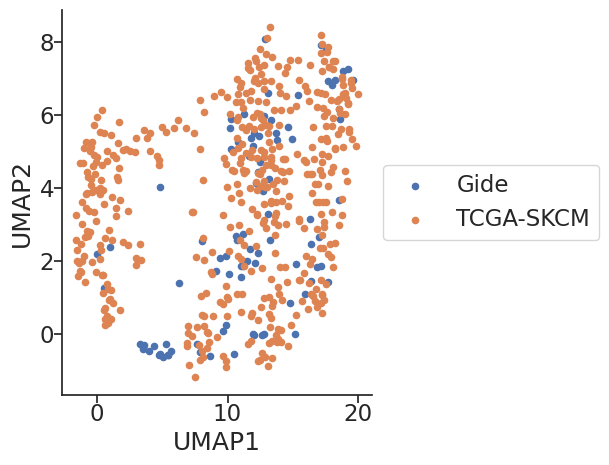

In [218]:
df1 = df_save[sg].loc[sidx1]
bottom_tertile_threshold = df1.quantile(1/2)
# 判断每个基因是否非活跃
st1 = df1.apply(lambda x: x.gt(bottom_tertile_threshold), axis=1)*1.0

df2 = df_save[sg].loc[sidx2]
bottom_tertile_threshold2 = df2.quantile(1/2)
# 判断每个基因是否非活跃
st2 = df2.apply(lambda x: x.gt(bottom_tertile_threshold2), axis=1)*1.0

dfn = pd.concat([st1, st2])
df_save4 = cohort.join(dfn)

plot_batch_effect(df_save3)

In [229]:
df1.quantile(1/4)

ENSG00000166167.18    3.397159
ENSG00000159842.15    5.423639
ENSG00000135900.4     6.103074
ENSG00000187122.17    0.174023
ENSG00000130733.11    5.181063
                        ...   
ENSG00000142687.18    4.784232
ENSG00000187010.21    0.258700
ENSG00000102897.10    3.348048
ENSG00000123983.14    5.754016
ENSG00000186994.11    1.082703
Name: 0.25, Length: 15659, dtype: float64

In [225]:
df1['ENSG00000166167.18'].describe()

count    473.000000
mean       3.731961
std        0.613421
min        1.601078
25%        3.397159
50%        3.776725
75%        4.118567
max        5.278925
Name: ENSG00000166167.18, dtype: float64

In [230]:
df_save3

,cohort,ENSG00000166167.18,ENSG00000159842.15,ENSG00000135900.4,ENSG00000187122.17,ENSG00000130733.11,ENSG00000183807.8,ENSG00000117640.18,ENSG00000083799.18,ENSG00000099797.15,...,ENSG00000140678.17,ENSG00000212296.1,ENSG00000158286.13,ENSG00000265107.3,ENSG00000203756.8,ENSG00000142687.18,ENSG00000187010.21,ENSG00000102897.10,ENSG00000123983.14,ENSG00000186994.11
ERR2208944,Gide,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
ERR2208928,Gide,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ERR2208949,Gide,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
ERR2208900,Gide,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
ERR2208922,Gide,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WE-A8K4-01A-12R-A37K-07,TCGA-SKCM,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
TCGA-ER-A19W-06A-41R-A239-07,TCGA-SKCM,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TCGA-D3-A2JP-06A-11R-A18S-07,TCGA-SKCM,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
TCGA-D3-A2J9-06A-11R-A18T-07,TCGA-SKCM,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
